<h1 id="tocheading">Table of Contents</h1>
<ul class="toc"><li><a href="#1.-Introduction-to-the-data-set">1. Introduction to the data set</a><a class="anchor-link" href="#1.-Introduction-to-the-data-set">¶</a></li><ul class="toc"><li><a href="#1.1.-First-five-rows-and-dimensions-of-data">1.1. First five rows and dimensions of data</a><a class="anchor-link" href="#1.1.-First-five-rows-and-dimensions-of-data">¶</a></li></ul><li><a href="#2.-Determine-features-and-targets">2. Determine features and targets</a><a class="anchor-link" href="#2.-Determine-features-and-targets">¶</a></li><ul class="toc"><li><a href="#2.1.-Target">2.1. Target</a><a class="anchor-link" href="#2.1.-Target">¶</a></li><li><a href="#2.2.-Features">2.2. Features</a><a class="anchor-link" href="#2.2.-Features">¶</a></li></ul><li><a href="#3.-Data-Cleaning">3. Data Cleaning</a><a class="anchor-link" href="#3.-Data-Cleaning">¶</a></li><ul class="toc"><li><a href="#3.1.-Unused-columns">3.1. Unused columns</a><a class="anchor-link" href="#3.1.-Unused-columns">¶</a></li><li><a href="#3.2.-Format-of-missing-values">3.2. Format of missing values</a><a class="anchor-link" href="#3.2.-Format-of-missing-values">¶</a></li><li><a href="#3.3.-Format-of-numerical-values">3.3. Format of numerical values</a><a class="anchor-link" href="#3.3.-Format-of-numerical-values">¶</a></li><li><a href="#3.4.-Handling-missing-values">3.4. Handling missing values</a><a class="anchor-link" href="#3.4.-Handling-missing-values">¶</a></li></ul><li><a href="#4.-Predictions-using-K-nearest-neighbours-algorithm">4. Predictions using K-nearest neighbours algorithm</a><a class="anchor-link" href="#4.-Predictions-using-K-nearest-neighbours-algorithm">¶</a></li><ul class="toc"><li><a href="#4.1.-Create-functions">4.1. Create functions</a><a class="anchor-link" href="#4.1.-Create-functions">¶</a></li><li><a href="#4.2.-Univariate-Model">4.2. Univariate Model</a><a class="anchor-link" href="#4.2.-Univariate-Model">¶</a></li><ul class="toc"><li><a href="#4.2.1.-Best-K-in-K-nearest-neighbours-for-each-feature-(where-K-ranges-from-1-to-and-including-30)">4.2.1. Best K in K-nearest neighbours for each feature (where K ranges from 1 to and including 30)</a><a class="anchor-link" href="#4.2.1.-Best-K-in-K-nearest-neighbours-for-each-feature-(where-K-ranges-from-1-to-and-including-30)">¶</a></li></ul><li><a href="#4.3.-Multivariate-Model">4.3. Multivariate Model</a><a class="anchor-link" href="#4.3.-Multivariate-Model">¶</a></li><ul class="toc"><li><a href="#4.3.1.-Best-K-in-K-nearest-neighbours-for-subsets-of-top-features-(where-K-ranges-from-1-to-and-including-30)">4.3.1. Best K in K-nearest neighbours for subsets of top features (where K ranges from 1 to and including 30)</a><a class="anchor-link" href="#4.3.1.-Best-K-in-K-nearest-neighbours-for-subsets-of-top-features-(where-K-ranges-from-1-to-and-including-30)">¶</a></li></ul></ul></ul>

Project guide: https://www.dataquest.io/m/155/guided-project%3A-predicting-car-prices

Solution by DataQuest: https://github.com/dataquestio/solutions/blob/master/Mission155Solutions.ipynb

In this guided project, I will use [K-nearest neighbours algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) predict a car's `price` based on its other attributes.

Per feature of set of features, the best K value in K-nearest neighbourhood model will be identified in 5-fold cross validation. I will try K values ranging from 1 to and including 30, which is specified in `k_list` variable. 

"Best K value" is defined this way. For each K value, the mean and standard deviation of RMSE (square root of mean squared error) values are taken across 5-folds cross validation. Then, the mean and standard deviation are multiplied together. If we call this the "product", the K value with the smallest "product" will be the "best K value".

Both univariate and multivariate models will be tried. "Univariate" refers to using *one* feature (column in data frame) to predict the target. "Multivariate" means using multiple features instead.

This project is limited in that it does not identify the best number of folds in cross validation. Only 5-fold cross validation will be used, which is specified in `fold_num` variable.


# 1. Introduction to the data set

Excerpt from DataQuest
___
The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)
___

## 1.1. First five rows and dimensions of data

In [1]:
from IPython.display import display

import pandas as pd
import numpy as np

# 1. Display first 5 rows of data
# Column labels (labels are not included in dataset)
column_labels = ["symboling", "normalized-losses", "make", \
                 "fuel-type", "aspiration", "num-of-doors", \
                 "body-style", "drive-wheels", "engine-location", \
                 "wheel-base", "length", "width", "height", \
                 "curb-weight", "engine-type", "num-of-cylinders", \
                 "engine-size", "fuel-system", "bore", "stroke", \
                 "compression-ratio", "horsepower", "peak-rpm", \
                 "city-mpg", "highway-mpg", "price"]

# Read in dataset as a data frame
cars = pd.read_csv("imports-85.data.csv", names=column_labels)

# Numbers of rows and columns of data frame
cars_rows = cars.shape[0]
cars_cols = cars.shape[1]

# adjust data frame display settings
pd.options.display.max_columns = cars_cols
pd.options.display.max_rows = cars_rows
pd.options.display.max_colwidth = 100

# adjust data frame display settings
# (use FLOAT instead of scientific numbers)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# display first 5 rows of data frame
display(cars.head(5))

# 2. Display dimensions of data frame
print("Number of rows:", cars_rows)
print("Number of columns:", cars_cols)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.600000,168.800000,64.100000,48.800000,2548,dohc,four,130,mpfi,3.47,2.68,9.000000,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.500000,171.200000,65.500000,52.400000,2823,ohcv,six,152,mpfi,2.68,3.47,9.000000,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.800000,176.600000,66.200000,54.300000,2337,ohc,four,109,mpfi,3.19,3.40,10.000000,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.400000,176.600000,66.400000,54.300000,2824,ohc,five,136,mpfi,3.19,3.40,8.000000,115,5500,18,22,17450


Number of rows: 205
Number of columns: 26


# 2. Determine features and targets

A K-nearest neighbours model will be trained so that *features* will predict the *target*.

## 2.1. Target
The target is the `price` column.

## 2.2. Features

The potential feature columns are listed below.

* `normalized-losses`
* `wheel-base`
* `length`
* `width`
* `height`
* `curb-weight`
* `engine-size`
* `bore`
* `stroke`
* `compression-ratio`
* `horsepower`
* `peak-rpm`
* `city-mpg`
* `highway-mpg`

These columns contain "continuous" data as indicated in the [data description](https://archive.ics.uci.edu/ml/datasets/automobile) and also meet the following criteria: (1) the data contains numeric values, (2) the values can be meaningfully comapred - height can be a feature, but a (numeric) zipcode cannot - and (3) the values spread across a considerable range. The third criteria has been set to avoid the model being too simplistic.

Features will be selected from this list in later steps.

# 3. Data Cleaning

## 3.1. Unused columns

The columns which are neither features nor a target will be removed.

In [2]:
# all columns suitable to be features or target
used_cols = ["normalized-losses", "wheel-base", "length", \
                "width", "height", "curb-weight", "engine-size", \
                "bore", "stroke", "compression-ratio", \
                "horsepower", "peak-rpm", "city-mpg", \
                "highway-mpg", "price"]

# remove all unused columns
not_used_cols = list(set(cars.columns) - set(used_cols))
cars.drop(not_used_cols, axis=1, inplace=True)

print(cars.columns)

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


## 3.2. Format of missing values

Missing values are represented as `?` in some columns. These will be replaced by `np.nan`.

In [3]:
print("Columns in which '?' has been replaced with np.nan:")
for c in cars.columns:
    column = cars[c]
    if "?" in list(column.unique()):
        print(c)
        
# replace "?" with np.nan
cars.replace("?", np.nan, inplace=True)

# display first 5 rows of data
display(cars.head(5))

Columns in which '?' has been replaced with np.nan:
normalized-losses
bore
stroke
horsepower
peak-rpm
price


,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.600000,168.800000,64.100000,48.800000,2548,130,3.47,2.68,9.000000,111,5000,21,27,13495
1,NaN,88.600000,168.800000,64.100000,48.800000,2548,130,3.47,2.68,9.000000,111,5000,21,27,16500
2,NaN,94.500000,171.200000,65.500000,52.400000,2823,152,2.68,3.47,9.000000,154,5000,19,26,16500
3,164,99.800000,176.600000,66.200000,54.300000,2337,109,3.19,3.40,10.000000,102,5500,24,30,13950
4,164,99.400000,176.600000,66.400000,54.300000,2824,136,3.19,3.40,8.000000,115,5500,18,22,17450


## 3.3. Format of numerical values

Some column's data types are `object` (i.e. string) because missing values were saved as `?` which is a string. These columns will be converted into `float` data type.

Note that the columns with integers will also be converted as floats because pandas cannot save `NaN` value in an integer column (<a href="https://stackoverflow.com/a/21290084/">https://stackoverflow.com/a/21290084</a>).

In [4]:
# convert data types
cars[used_cols] = cars[used_cols].astype(float)

# display data types
print(cars.dtypes)

normalized-losses    float64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-size          float64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object


## 3.4. Handling missing values

The sources below describes a number of different ways to handle missing data. These include deletion (remove rows and/or columns containing missing values), imputation (replace missing values with column mean value), regression, etc. The most popular method seems to be multiple imputation.

* [Imputation (statistics)](https://en.wikipedia.org/wiki/Imputation_(statistics%29)
* [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)
* [MeasuringU: 7 Ways to Handle Missing Data](https://measuringu.com/handle-missing-data/)
    * [Multiple Imputation For Missing Data: What Is It And How Can I use It?](Multiple_Imputation_For_Missing_Data-What_Is_It_And_How_Can_I_use_It.pdf) (downloaded from [here](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.519.4667&rep=rep1&type=pdf))
* Penn State → Statistical and Analytical Methods → [Missing Data Imputation](http://web.pop.psu.edu/projects/help_archive/help.pop.psu.edu/help-by-statistical-method/missing-data-imputation.html)
* [Quora - What is the best way to handle missing data for classification problem in machine learning?](https://www.quora.com/What-is-the-best-way-to-handle-missing-data-for-classification-problem-in-machine-learning)
* [Missing Data & How to Deal: An overview of missing data](Missing_Data_and_How_to_Deal-An_overview_of_missing_data.pdf) (downloaded from [here](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf))

However, I will use only delition because more sophisticated methods are beyond the scope of this project and beyond my current skills level and personal time restraint.

Missing value count per column is shown below.

In [5]:
# show number of null values per column
cars_null = cars.isna()
cars_null_sum = cars_null.sum()

cars_null_sum

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Now, let us look at just the columns and rows with missing values.

In [6]:
# all columns
cols = cars_null_sum.index

# null columns indices
col_inds = cars_null_sum.to_numpy().nonzero()[0]

# null columns labels
cars_null_cols = cols[col_inds]

# null rows indices
cars_null_inds = cars.isnull().any(axis=1).to_numpy().nonzero()[0]

# Show rows and columns with null values
display(cars.loc[cars_null_inds, cars_null_cols])
print("Number of rows:", len(cars_null_inds))

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
0,nan,3.470000,2.680000,111.000000,5000.000000,13495.000000
1,nan,3.470000,2.680000,111.000000,5000.000000,16500.000000
2,nan,2.680000,3.470000,154.000000,5000.000000,16500.000000
5,nan,3.190000,3.400000,110.000000,5500.000000,15250.000000
7,nan,3.190000,3.400000,110.000000,5500.000000,18920.000000
9,nan,3.130000,3.400000,160.000000,5500.000000,nan
14,nan,3.310000,3.190000,121.000000,4250.000000,24565.000000
15,nan,3.620000,3.390000,182.000000,5400.000000,30760.000000
16,nan,3.620000,3.390000,182.000000,5400.000000,41315.000000
17,nan,3.620000,3.390000,182.000000,5400.000000,36880.000000


Number of rows: 45


Obviously, removing all these rows will result in too great a loss. So, I will first remove `normalized-losses` column which is missing 41 values.

In [7]:
to_remove = "normalized-losses"
cars = cars.drop(to_remove, axis=1)

# show updated columns list
display(cars.columns.tolist())

# update used_cols
used_cols.remove(to_remove)

['wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

For the other columns, all rows (n=10, which is about 5% of all entries) with missing values will be removed.

Imputation is not being considered to keep the training data truest possible.

In [8]:
cars = cars.dropna()
cars.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

# 4. Predictions using K-nearest neighbours algorithm

## 4.1. Create functions

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(df, feature_cols, target_col, k_list, fold_num, ymax=None, vis=False, print_lowest=True):
    """
    df: Data frame
    feature_cols: Columns to make predictions with
    target_col: Column to be predicted
    k_list: List of k values for k-nearest neighbours model
    
    df is splitted into training and test sets.
    A K-nearest neighbour model is fit with training data.
    A prediction is made on test data.
    
    The function returns the square root of mean squared error (RMSE)
    between actual and predicted values in target_col.
    """

    # ensure feature_cols is a list
    feature_cols = [feature_cols] \
                   if type(feature_cols) == str \
                   else feature_cols
    
    # ensure k_list is a list
    k_list = [k_list] \
             if type(k_list) == int \
             else k_list

    # add "fold" column
    df = add_fold_column(df, fold_num)
    
    # get total number of folds in df
    folds = df["fold"].unique()
    
    # initialise lists of RMSE mean, std and their product (ms)
    rmse_fold_mean_list = []
    rmse_fold_std_list = []
    rmse_fold_ms_list = []

    # for each k
    for k in k_list:

        # initialise list of RMSEs per fold value
        rmse_fold_list = []

        # for each fold
        for fold in folds:

            # split data frame into training/test and feature/target sets
            train_features, train_target, \
            test_features, test_target \
                = split_into_train_test(df, fold, feature_cols, target_col)

            # get RMSE
            rmse_fold = run_K_nearest_neighbour(k, train_features, \
                                             train_target, \
                                             test_features, \
                                             test_target)

            # update list of RMSE per fold value
            rmse_fold_list.append(rmse_fold)
            
        # get mean of RMSE per k value
        rmse_fold_mean = np.mean(rmse_fold_list)
        rmse_fold_std = np.std(rmse_fold_list)
        
        # update RMSE lists
        rmse_fold_mean_list.append(rmse_fold_mean)
        rmse_fold_std_list.append(rmse_fold_std)
        rmse_fold_ms_list.append(rmse_fold_mean * rmse_fold_std)
        
    # Best K value and product of RMSE mean and std
    rmse_ms_best = min(rmse_fold_ms_list)
    rmse_ms_best_ind = rmse_fold_ms_list.index(rmse_ms_best)
    
    rmse_mean_best = rmse_fold_mean_list[rmse_ms_best_ind]
    rmse_std_best = rmse_fold_std_list[rmse_ms_best_ind]
    k_best = k_list[rmse_ms_best_ind]

    # if multiple K values were used, indicate the best RMSE and its K value
    if print_lowest:
        print("Lowest [RMSE mean] x [RMSE std] ({})\nis acquired when k = {}"\
              .format(rmse_ms_best, k_best))
        
    # visualise product of RMSE mean and std for each k value
    if vis:
        
        # create plot
        scatter_plot(k_list, rmse_fold_ms_list, xlabel, \
                     ylabel, target_col, feature_cols, \
                     fold_num, ymax)

    return k_best, rmse_ms_best, rmse_mean_best, rmse_std_best


def run_K_nearest_neighbour(k, train_features, train_target, test_features, test_target):
    
    # create K-nearest neighbour instance
    knn = KNeighborsRegressor(n_neighbors=k, algorithm="auto")

    # fit model using training set
    knn.fit(X=train_features, y=train_target)

    # predict target in test set
    predictions = knn.predict(X=test_features)

    # get RMSE
    rmse = np.sqrt(mean_squared_error(y_true=test_target, y_pred=predictions))
    
    return rmse


def scatter_plot(x, y, xlabel, ylabel, target_col, feature_cols, fold_num, ymax):
    # create figure and axis
    fig, ax = plt.subplots()
    
    # create scatter plot
    plt.scatter(x, y)
    
    # set y axis range
    ax.set_ylim(bottom=0, top=ymax)
    
    # set axis label format
    ax.ticklabel_format(style="plain")
    
    # add x and y labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # add title create string version of feature_cols for plot
    feature_cols_str = to_string(feature_cols)    

    title = """Prediction accuracy of K-nearest neighbours:
{} is predicted based on\n{}"""\
                    .format(target_col, feature_cols_str)

    ax.set_title(title)
    
    # show plot
    plt.show()
    
    # create margin at the bottom
    print("\n\n")


def to_string(input_):
    """
    input_ is a string or a list.
    Ensure input_ is returned as a string.
    """
    
    # Return input_ if it's a string
    if type(input_) != list:
        return str(input_)
    
    # Otherwise, convert it to string
    else:
        input_str = ""
        for i in range(len(input_)):
            col = str(input_[i])

            if i == 0:
                input_str += col
            elif i < len(input_) - 1:
                input_str += ", " + col
            else:
                input_str += " and " + col
    
    return input_str


def add_fold_column(df, fold_num):
    
    # set size of each fold
    fold_size = int(df.shape[0] / fold_num)

    # length of remaining part of folds list to be filled
    fold_list_rl = df.shape[0]

    # create fold column
    df["fold"] = np.nan

    for fold in range(1, fold_num + 1):

        start_idx = (fold - 1) * fold_size

        # fold size for the last partition
        if fold == fold_num:
            fold_size = fold_list_rl

        last_idx = start_idx + fold_size

        for idx in range(start_idx, last_idx):

            # assign fold value per row (-1 is the column index)
            df.iat[idx, -1] = fold

        fold_list_rl -= fold_size
    
    return df


def split_into_train_test(df, fold, feature_cols, target_col):
    
    # current fold is for test set
    # the others are for training set
    test_fold = fold

    # set filter for training and test data
    train_filter = df["fold"] != test_fold
    test_filter = (train_filter == False)

    # specify training and test data
    train_df = df[train_filter]
    test_df = df[test_filter]

    # create sets of feature and target
    # double square brackets ("[[]]") were used
    # to make feature sets data frames (http://bit.ly/2FxAWhl)
    train_features = train_df[feature_cols]
    train_target = train_df[target_col]

    test_features = test_df[feature_cols]
    test_target = test_df[target_col]
    
    return train_features, train_target, \
           test_features, test_target


def to_df(col_labels, col_data, sort_by_label):
    """
    col_labels: List of column labels in data frame
    col_data: List of column data in data frame
    sort_by_label: Column label to sort data frame by
    """
    
    # initialise a data frame
    df = pd.DataFrame()
    
    # assign columns to data frame
    for ind, val in enumerate(col_labels):
        df[val] = col_data[ind]
    
    # sort data frame
    df = df.sort_values(by=sort_by_label)
    
    return df

## 4.2. Univariate Model

### 4.2.1. Best K in K-nearest neighbours for each feature (where K ranges from 1 to and including 30)

A 5-fold cross validation will be used.

Best RMSE and K-values per feature in univariate K-nearest neighbours
where K ranged from 1 to and including 30
in 5-fold cross validation



Lowest [RMSE mean] x [RMSE std] (8786448.069275245)
is acquired when k = 8


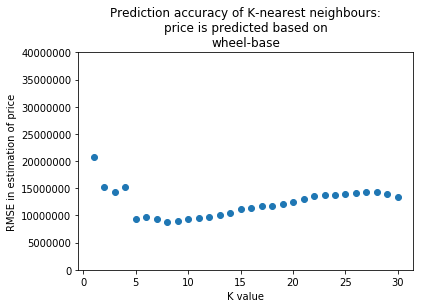




Lowest [RMSE mean] x [RMSE std] (7290539.346749897)
is acquired when k = 6


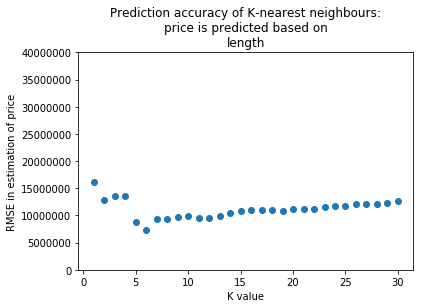




Lowest [RMSE mean] x [RMSE std] (6972643.949901322)
is acquired when k = 4


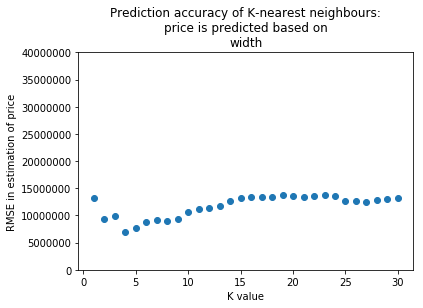




Lowest [RMSE mean] x [RMSE std] (7518514.215365862)
is acquired when k = 1


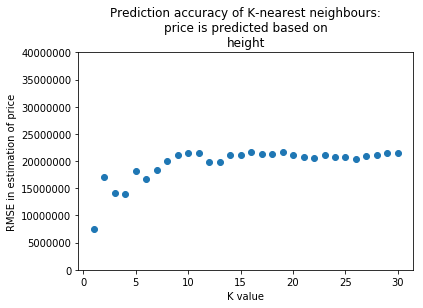




Lowest [RMSE mean] x [RMSE std] (7668027.636632569)
is acquired when k = 5


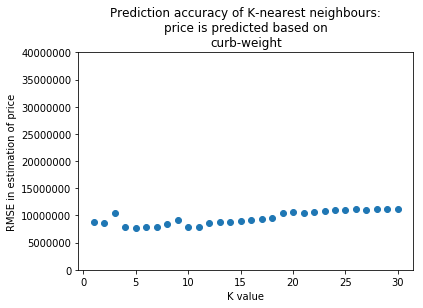




Lowest [RMSE mean] x [RMSE std] (1524091.6304164606)
is acquired when k = 6


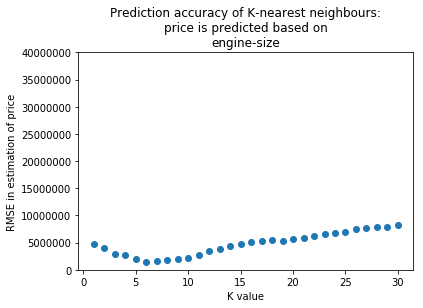




Lowest [RMSE mean] x [RMSE std] (6087484.849444724)
is acquired when k = 1


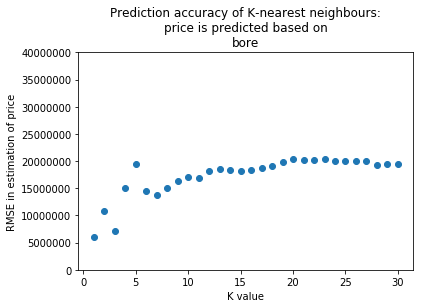




Lowest [RMSE mean] x [RMSE std] (22702572.531126544)
is acquired when k = 29


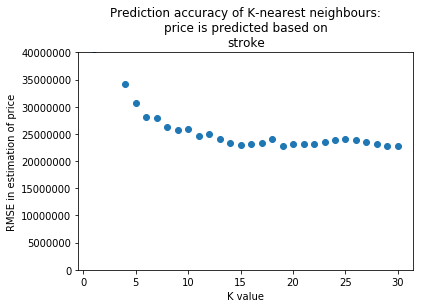




Lowest [RMSE mean] x [RMSE std] (10675602.090651488)
is acquired when k = 5


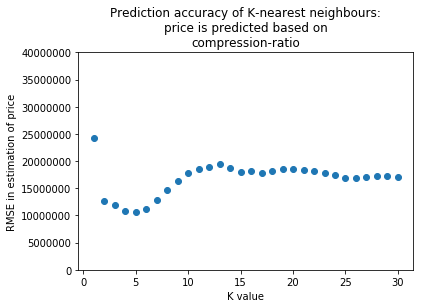




Lowest [RMSE mean] x [RMSE std] (6203732.335042465)
is acquired when k = 1


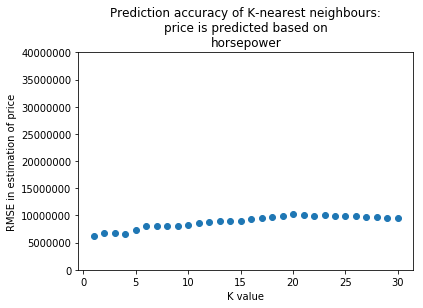




Lowest [RMSE mean] x [RMSE std] (23818183.458145134)
is acquired when k = 25


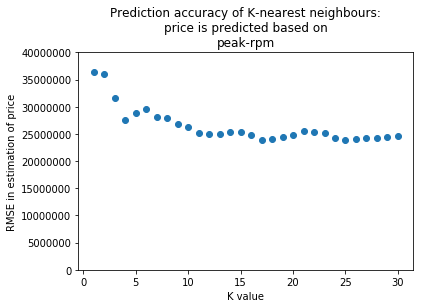




Lowest [RMSE mean] x [RMSE std] (4336240.203885342)
is acquired when k = 2


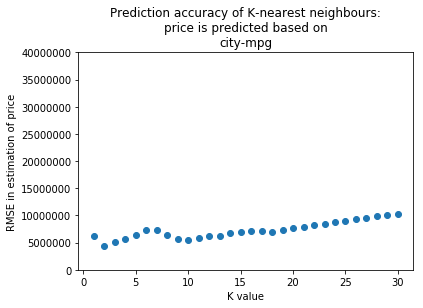




Lowest [RMSE mean] x [RMSE std] (5958205.95578648)
is acquired when k = 5


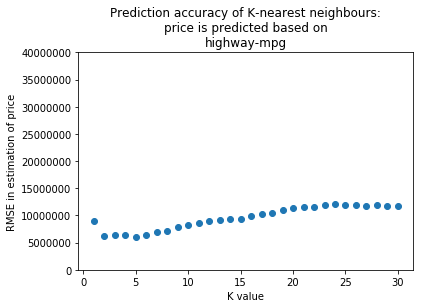

In [10]:
# set target
target_col = "price"

# set features
feature_cols = used_cols[:]
feature_cols.remove(target_col)

# set K-values (from 1 to and including 30) in K-nearest neighbours algorithm
k_list = [k for k in range(1, 31)]

# set number of folds in K-fold cross-validation
fold_num = 5

# set labels and title for plot
xlabel = "K value"
ylabel = "RMSE in estimation of {}".format(target_col)






print("""Best RMSE and K-values per feature in univariate K-nearest neighbours
where K ranged from {} to and including {}
in {}-fold cross validation""".format(np.min(k_list), np.max(k_list), fold_num))
print("\n\n")

# initialize lists of best rmses and K values
k_best_list = []
rmse_ms_list = []
rmse_mean_list = []
rmse_std_list = []

# get best RMSE and K value for each feature
for f in feature_cols:
    
    k_best, rmse_ms, rmse_mean, rmse_std = knn_train_test(df=cars, \
                                                       feature_cols=f, \
                                                       target_col=target_col, \
                                                       k_list=k_list, \
                                                       vis=True, \
                                                       fold_num=fold_num, \
                                                       ymax=40000000)
    
    k_best_list.append(k_best)
    rmse_ms_list.append(rmse_ms)
    rmse_mean_list.append(rmse_mean)
    rmse_std_list.append(rmse_std)

Below is a summary table.

In [11]:
# display RMSE for each feature
col_labels = ["Feature", "Best K for K-nearest neighbours", \
              "Lowest (RMSE mean) * (RMSE std)", \
              "Optimal RMSE mean", "Optimal RMSE std"]

col_sort_by = col_labels[2]


uni_n_neighb = to_df(col_labels=col_labels, \
                     col_data=[feature_cols, \
                               k_best_list, \
                               rmse_ms_list, \
                               rmse_mean_list, \
                               rmse_std_list], \
                     sort_by_label=col_sort_by)

display(uni_n_neighb)

,Feature,Best K for K-nearest neighbours,Lowest (RMSE mean) * (RMSE std),Optimal RMSE mean,Optimal RMSE std
5,engine-size,6,1524091.630416,3998.032499,381.210416
11,city-mpg,2,4336240.203885,5096.254053,850.868139
12,highway-mpg,5,5958205.955786,4724.622058,1261.096842
6,bore,1,6087484.849445,10358.627826,587.672900
9,horsepower,1,6203732.335042,5666.460758,1094.816077
2,width,4,6972643.949901,6125.808645,1138.240574
1,length,6,7290539.346750,6950.374966,1048.941875
3,height,1,7518514.215366,13244.015006,567.691460
4,curb-weight,5,7668027.636633,5181.978249,1479.749097
0,wheel-base,8,8786448.069275,7528.787421,1167.046906


When individual features are used to predict `price`, `engine-size` makes the best prediction with 6-nearest neighbourhood model. The model was tested in 5-fold cross validation.

## 4.3. Multivariate Model

### 4.3.1. Best K in K-nearest neighbours for subsets of top features (where K ranges from 1 to and including 30)

From the previous step, the features with 5 best RMSEs will be selected. Their subsets will be used accumulatively. That is, I will first use top two features, then top three, four and five features.

For each subset, best K value will be identified in a 5-fold cross validation.

Best RMSE and K-values per feature subsets in multivariate K-nearest neighbours
where K ranged from 1 to and including 30
in 5-fold cross validation



Lowest [RMSE mean] x [RMSE std] (1647070.669487097)
is acquired when k = 1


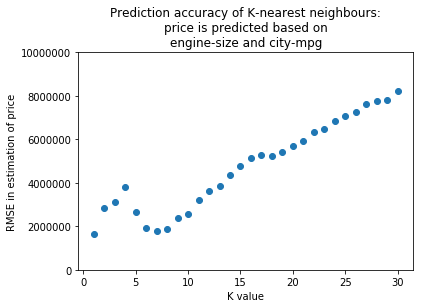




Lowest [RMSE mean] x [RMSE std] (2054271.6075134345)
is acquired when k = 6


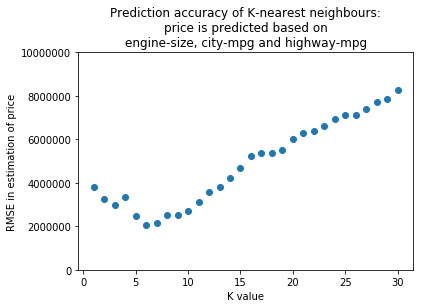




Lowest [RMSE mean] x [RMSE std] (2055694.9878591069)
is acquired when k = 6


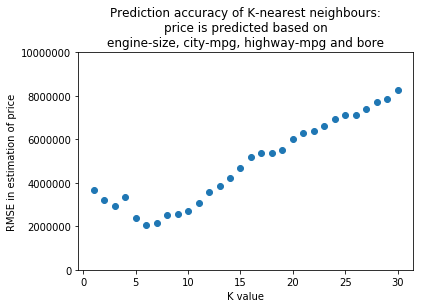




Lowest [RMSE mean] x [RMSE std] (1983139.7732315932)
is acquired when k = 2


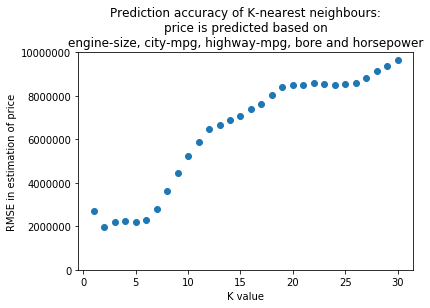

In [12]:
print("""Best RMSE and K-values per feature subsets in multivariate K-nearest neighbours
where K ranged from {} to and including {}
in {}-fold cross validation""".format(np.min(k_list), np.max(k_list), fold_num))
print("\n\n")

# set labels and title for plot
xlabel = "K value"
ylabel = "RMSE in estimation of {}".format(target_col)

# min/max subset size (ss) of top features
ss_min = 2
ss_max = 5

# initialize lists of feature subsets, best rmses and K values
feature_cols_list = []
k_best_list = []
rmse_ms_list = []
rmse_mean_list = []
rmse_std_list = []


# for each accumulative subset of top 5 features
for ss in range(ss_min, ss_max + 1):
    
    # get subset
    feature_cols = uni_n_neighb["Feature"].head(ss).tolist()

    # get best RMSE and K value for each feature
    k_best, rmse_ms, rmse_mean, rmse_std = knn_train_test(df=cars, \
                                                           feature_cols=feature_cols, \
                                                           target_col=target_col, \
                                                           k_list=k_list, \
                                                           vis=True, \
                                                           fold_num=fold_num, \
                                                           ymax=10000000)

    # update lists
    feature_cols_list.append(feature_cols)
    k_best_list.append(k_best)
    rmse_ms_list.append(rmse_ms)
    rmse_mean_list.append(rmse_mean)
    rmse_std_list.append(rmse_std)

Following is a summary table.

In [13]:
multi_n_neighb = to_df(col_labels=col_labels, \
                     col_data=[feature_cols_list, \
                               k_best_list, \
                               rmse_ms_list, \
                               rmse_mean_list, \
                               rmse_std_list], \
                     sort_by_label=col_sort_by)

display(multi_n_neighb)

,Feature,Best K for K-nearest neighbours,Lowest (RMSE mean) * (RMSE std),Optimal RMSE mean,Optimal RMSE std
0,"[engine-size, city-mpg]",1,1647070.669487,4206.729945,391.532304
3,"[engine-size, city-mpg, highway-mpg, bore, horsepower]",2,1983139.773232,3139.577299,631.658209
1,"[engine-size, city-mpg, highway-mpg]",6,2054271.607513,3838.786324,535.135700
2,"[engine-size, city-mpg, highway-mpg, bore]",6,2055694.987859,3845.859151,534.521652


When multiple features are used together to predict `price`, `engine-size` and `city-mpg` make the best prediction with 1-nearest neighbourhood model. The model was tested in 5-fold cross validation.